In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate

plt.rcParams['figure.dpi']= 200
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [2]:
## 1a ##
def f(t,y):
    x = -3*y*np.sin(t)
    return x

def fe(dt, start, stop, y_0):
    y = np.zeros(int(np.round((stop-start)/dt) + 1))
    t_arr = np.linspace(start,stop,y.size)
    y[0] = y_0
    for i in range(len(t_arr)-1):
        y[i+1] = y[i] + dt*f(t_arr[i], y[i])
    return y

dts = np.array([2**-2, 2**-3, 2**-4, 2**-5, 2**-6, 2**-7, 2**-8])
E_fe = np.zeros((len(dts)))

t_0 = 0
tN = 5
y_0 = np.pi/np.sqrt(2)

for j, dt in enumerate(dts):
    y_fe = fe(dt, t_0, tN, y_0)
    y_true = np.pi*np.exp(3*(np.cos(5) - 1))/np.sqrt(2)
    E_fe[j] = np.abs(y_true - y_fe[-1])
    
l_fe = np.polyfit(np.log(dts), np.log(E_fe), deg = 1)

A1 = y_fe.reshape(-1,1)
A2 = E_fe.reshape(1,-1)
A3 = l_fe[0]

In [3]:
## 1b ##
def f(t,y):
    x = -3*y*np.sin(t)
    return x

def heun(dt, start, stop, y_0):
    y = np.zeros(int(np.round((stop-start)/dt) + 1))
    t_arr = np.linspace(start,stop,y.size)
    y[0] = y_0
    for i in range(len(t_arr)-1):
        ytilde = y[i] + dt*f(t_arr[i], y[i])
        y[i+1] = y[i] + (dt/2)*(f(t_arr[i],y[i]) + f(t_arr[i+1], ytilde))
    return y

dts = np.array([2**-2, 2**-3, 2**-4, 2**-5, 2**-6, 2**-7, 2**-8])
E_heun = np.zeros((len(dts)))

t_0 = 0
tN = 5
y_0 = np.pi/np.sqrt(2)

for j, dt in enumerate(dts):
    y_heun = heun(dt, t_0, tN, y_0)
    y_true = np.pi*np.exp(3*(np.cos(5) - 1))/np.sqrt(2)
    E_heun[j] = np.abs(y_true - y_heun[-1])
    
l_heun = np.polyfit(np.log(dts), np.log(E_heun), deg = 1)

A4 = y_heun.reshape(-1,1)
A5 = E_heun.reshape(1,-1)
A6 = l_heun[0]

In [4]:
## 1c ##
def f(t,y):
    x = -3*y*np.sin(t)
    return x

def adams(dt, start, stop, y_0):
    y = np.zeros(int(np.round((stop-start)/dt) + 1))
    t_arr = np.linspace(start,stop,y.size)
    y[0] = y_0
    y[1] = y[0] + dt*f((t_arr[0] + dt/2), (y[0] + (dt/2)*f(t_arr[0],y[0])))
    for i in range(1,len(t_arr)-1):
        yp = y[i] + (dt/2)*(3*f(t_arr[i],y[i]) - f(t_arr[i-1], y[i-1]))
        y[i+1] = y[i] + (dt/2)*(f(t_arr[i+1],yp) + f(t_arr[i],y[i]))
    return y

dts = np.array([2**-2, 2**-3, 2**-4, 2**-5, 2**-6, 2**-7, 2**-8])
E_adams= np.zeros((len(dts)))

t_0 = 0
tN = 5
y_0 = np.pi/np.sqrt(2)

for j, dt in enumerate(dts):
    y_adams = adams(dt, t_0, tN, y_0)
    y_true = np.pi*np.exp(3*(np.cos(5) - 1))/np.sqrt(2)
    E_adams[j] = np.abs(y_true - y_adams[-1])
    
l_adams = np.polyfit(np.log(dts), np.log(E_adams), deg = 1)

A7 = y_adams.reshape(-1,1)
A8 = E_adams.reshape(1,-1)
A9 = l_adams[0]

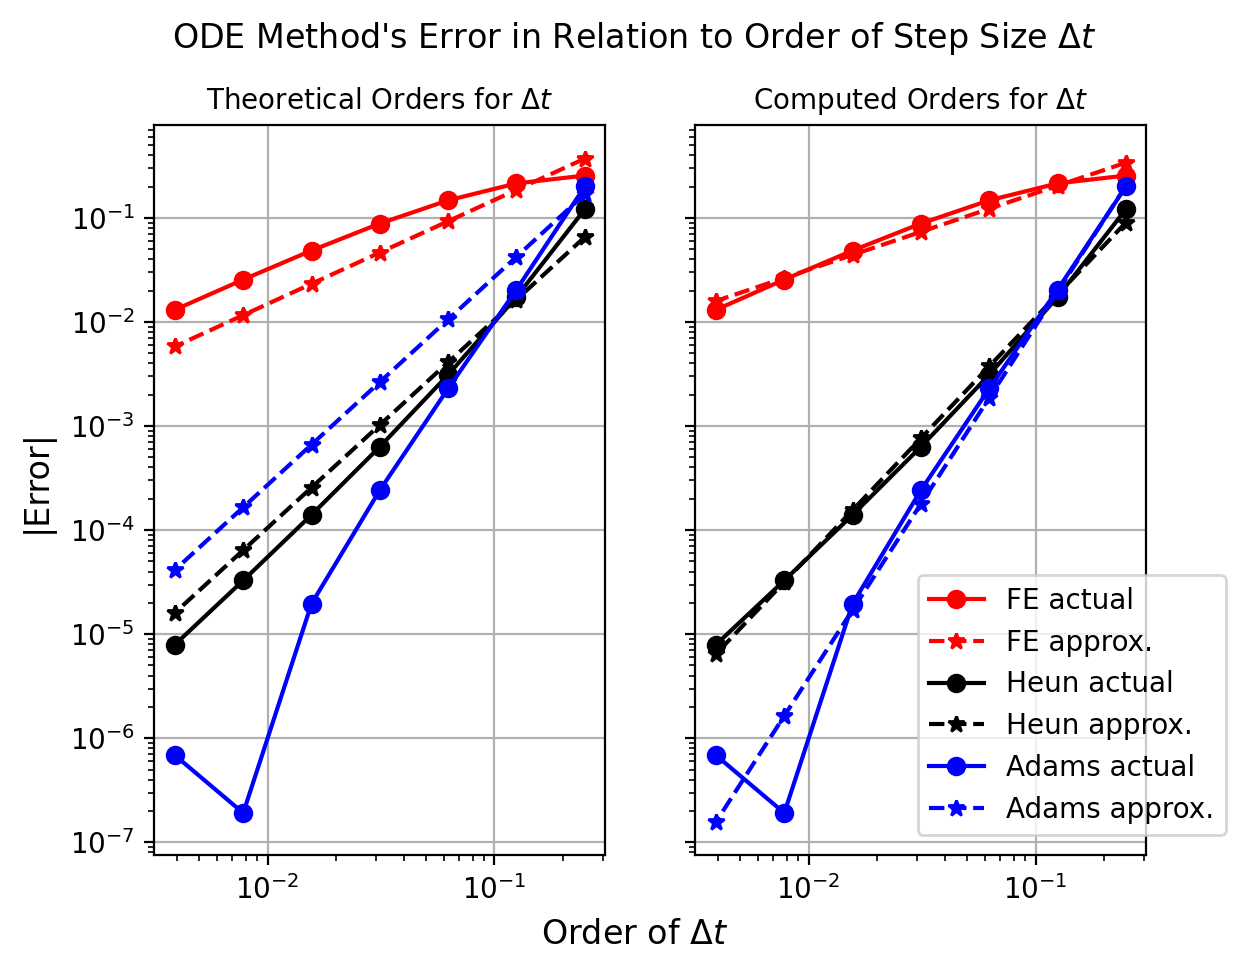

In [5]:
## 1plot ##
names = ['FE', 'Heun', 'Adams']
intercepts = [4e-1,5e-2,1]
orders = [1,2,2]
slopes = [l_fe, l_heun, l_adams]
color = ['r','k','b']
fig, ax1 = plt.subplots(1,2, sharey = True)
for i, E in enumerate([E_fe, E_heun, E_adams]):
    ax1[0].loglog(dts, E, f'o{color[i]}-', label = f'{names[i]} actual')
    ax1[0].loglog(dts, (np.exp(intercepts[i])*dts**orders[i]), f'*{color[i]}--', label = f'{names[i]} approx.')
    ax1[1].loglog(dts, E, f'o{color[i]}-')
    ax1[1].loglog(dts, (np.exp(slopes[i][1])*dts**[slopes[i][0]]), f'*{color[i]}--')

ax1[0].set_title('Theoretical Orders for $\Delta t$', fontsize = 10)
ax1[1].set_title('Computed Orders for $\Delta t$', fontsize = 10)
ax1[0].grid()
ax1[1].grid()
fig.subplots_adjust(top = 0.87)
fig.supxlabel('Order of $\Delta t$')
fig.supylabel('|Error|')
fig.suptitle('ODE Method\'s Error in Relation to Order of Step Size $\Delta t$')
fig.legend(loc = [0.73,0.14])
plt.savefig('hw1_1.png')
plt.show()

In [6]:
## 2b ##
def pol_one(t, y):
    return np.array([y[1], -y[0] - (y[0]**2 - 1)*y[1]])

methods = ['RK45','RK23', 'BDF']
tols = np.array([1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10])
slopes = np.zeros((3))

y0 = [2,np.pi**2]

for i, method in enumerate(methods):
    tavg = np.zeros((tols.size))
    for j, tol in enumerate(tols):
        sol = sp.integrate.solve_ivp(pol_one, [0,32], y0, method = method, atol = tol, rtol = tol)
        blah = np.diff(sol.t)
        tavg[j] = np.mean(np.diff(sol.t))
        
    slopes[i] = np.polyfit(np.log(tavg), np.log(tols), deg = 1)[0]

A11 = slopes[0]
A12 = slopes[1]
A13 = slopes[2]

In [7]:
## 3 ##
def fitzhugh(t, y, d12, d21):
    a1 = 0.05
    a2 = 0.25
    b = 0.01
    c = b
    Ii = 0.1

    v1,v2,w1,w2 = y

    v1_new = -1*(v1**3) + (1 + a1)*(v1**2) - (a1*v1) - w1 + Ii + (d12*v2)
    w1_new = b*v1 - c*w1
    v2_new = -1*(v2**3) + (1 + a2)*(v2**2) - (a2*v2) - w2 + Ii + (d21*v1)
    w2_new = b*v2 - c*w2
    
    return [v1_new, v2_new, w1_new, w2_new]

def threesolver(d12, d21):
    sol = sp.integrate.solve_ivp(fitzhugh, [0,100], [0.1,0.1,0,0], args = (d12, d21), method = 'BDF', t_eval = np.linspace(0,100,201))
    return sol.y.T

A14 = threesolver(0.,0.)
A15 = threesolver(0.,0.2)
A16 = threesolver(-0.1,0.2)
A17 = threesolver(-0.3,0.2)
A18 = threesolver(-0.5,0.2)

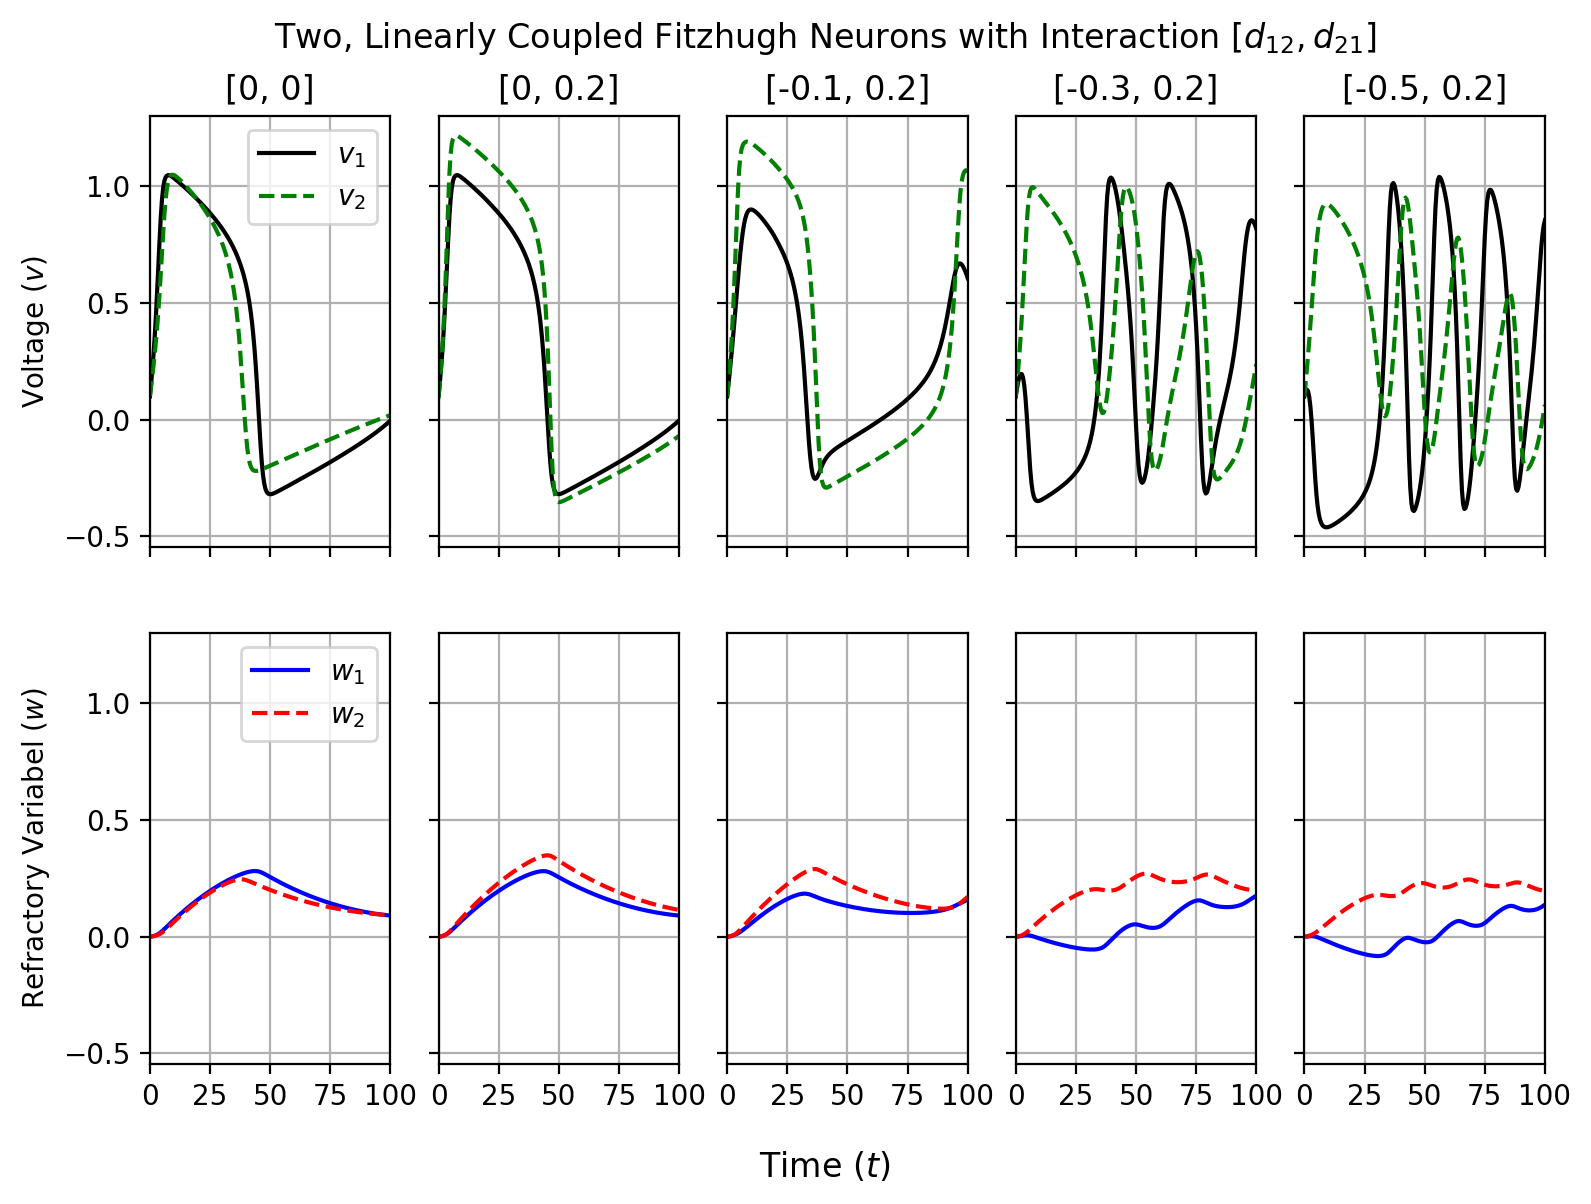

In [8]:
## 3plot ##
ds = [[0,0],[0,0.2],[-0.1,0.2],[-0.3,0.2],[-0.5,0.2]]

fig, ax = plt.subplots(2,5, figsize = (9,6), dpi = 200, sharey = True, sharex=True)
#fig.tight_layout(pad = 1)
for i, A in enumerate([A14, A15, A16, A17, A18]):
    ax[0,i].plot(np.linspace(0,100,201), A[:,0], 'k-', ms = 3, label = '$v_1$')
    ax[1,i].plot(np.linspace(0,100,201), A[:,2], 'b-', ms = 3, label = '$w_1$')
    ax[0,i].plot(np.linspace(0,100,201), A[:,1], 'g--', ms = 3, label = '$v_2$')
    ax[1,i].plot(np.linspace(0,100,201), A[:,3], 'r--', ms = 3, label = '$w_2$')
    for j in range(2):
        ax[j,i].set_xticks(np.linspace(0,100,5))
        ax[j,i].grid()
        ax[j,i].set_xlim([0,100])
    ax[0,i].set_title(f'{ds[i]}')

ax[0,0].legend()
ax[1,0].legend()
fig.supxlabel('Time $(t)$')
ax[0,0].set_ylabel('Voltage $(v)$')
ax[1,0].set_ylabel('Refractory Variabel $(w)$')
fig.subplots_adjust(top = 0.9)
fig.suptitle('Two, Linearly Coupled Fitzhugh Neurons with Interaction $[d_{12}, d_{21}]$')
plt.savefig('hw1_3.png')
plt.show()